In [1]:
import pandas as pd
import bs4
import requests
import urllib
import time
import json
import pickle
import os
from urllib.parse import urlparse, parse_qs
# from selenium import webdriver
# from selenium.webdriver.common.action_chains import ActionChains
# from selenium.webdriver.common.keys import Keys


[beautiful soup docs](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

#### change of plans
I think I've had change of heart and am going to go the requests route

### Brilliant Earth

In [2]:
### time to get all the diamond data from brilliant earth
## loose diamonds
if os.path.exists(os.path.abspath('./brilliant-earth.pickle')):
    with open('brilliant-earth.pickle', 'rb') as handle:
        be_diamond_data = pickle.load(handle)

else:
    
    be_diamond_data = []
    p_url = urlparse('https://www.brilliantearth.com/loose-diamonds/list/?shapes=All&cuts=Fair%2CGood%2CVery%20Good%2CIdeal%2CSuper%20Ideal&colors=J%2CI%2CH%2CG%2CF%2CE%2CD&clarities=SI2%2CSI1%2CVS2%2CVS1%2CVVS2%2CVVS1%2CIF%2CFL&polishes=Good%2CVery%20Good%2CExcellent&symmetries=Good%2CVery%20Good%2CExcellent&fluorescences=Very%20Strong%2CStrong%2CMedium%2CFaint%2CNone&min_carat=0.25&max_carat=1.20&min_table=45.00&max_table=87.00&min_depth=3.50&max_depth=89.10&min_price=400&max_price=802310&row=0&page=1&requestedDataSize=100&order_by=price&order_method=asc&currency=%24&min_ratio=1.00&max_ratio=2.75&diamond_blockchain=all&diamond_dor=all&MIN_PRICE=400&MAX_PRICE=802310&MIN_CARAT=0.25&MAX_CARAT=12.88&MIN_TABLE=45&MAX_TABLE=87&MIN_DEPTH=3.5&MAX_DEPTH=89.1&is_mobile=true&diamond_search=new')


    query = parse_qs(p_url.query)
    # extract the URL without query parameters
    url = p_url._replace(query=None).geturl()

    query['requestedDataSize'] = ['5000']

    for n in range(0,500):
        min_carat = "{:0.2f}".format(n/1e2)
        max_carat = "{:0.2f}".format(n/1e2+0.01)
    #     print(min_carat, max_carat)

        query['min_carat'] = min_carat
        query['max_carat'] = max_carat

        r = requests.get(url=url, params=query)

        data = json.loads(r.text)
        be_diamond_data = be_diamond_data + data.get('diamonds')
        
    # save brilliant earth data to pickle file    
    with open('brilliant-earth.pickle', 'wb') as handle:
        pickle.dump(be_diamond_data, handle)

In [11]:
be_df=pd.DataFrame(data=be_diamond_data)
be_df.shape

(115737, 62)

In [4]:
### brilliant earth
## lab diamonds

if os.path.exists(os.path.abspath('./brilliant-earth-lab.pickle')):
    with open('brilliant-earth-lab.pickle', 'rb') as handle:
        be_lab_diamond_data = pickle.load(handle)

else:
    
    be_lab_diamond_data = []
    p_url = urlparse('https://www.brilliantearth.com/lab-diamonds/list/?shapes=All&cuts=Fair%2CGood%2CVery%20Good%2CIdeal%2CSuper%20Ideal&colors=J%2CI%2CH%2CG%2CF%2CE%2CD&clarities=SI2%2CSI1%2CVS2%2CVS1%2CVVS2%2CVVS1%2CIF%2CFL&polishes=Good%2CVery%20Good%2CExcellent&symmetries=Good%2CVery%20Good%2CExcellent&fluorescences=Very%20Strong%2CStrong%2CMedium%2CFaint%2CNone&min_carat=0.25&max_carat=1.20&min_table=45.00&max_table=87.00&min_depth=3.50&max_depth=89.10&min_price=400&max_price=802310&row=0&page=1&requestedDataSize=100&order_by=price&order_method=asc&currency=%24&min_ratio=1.00&max_ratio=2.75&diamond_blockchain=all&diamond_dor=all&MIN_PRICE=400&MAX_PRICE=802310&MIN_CARAT=0.25&MAX_CARAT=12.88&MIN_TABLE=45&MAX_TABLE=87&MIN_DEPTH=3.5&MAX_DEPTH=89.1&is_mobile=true&diamond_search=new')


    query = parse_qs(p_url.query)
    # extract the URL without query parameters
    url = p_url._replace(query=None).geturl()

    query['requestedDataSize'] = ['5000']

    for n in range(0, 500):
        min_carat = "{:0.2f}".format(n/1e2)
        max_carat = "{:0.2f}".format(n/1e2+0.01)
#         print(min_carat, max_carat)

        query['min_carat'] = min_carat
        query['max_carat'] = max_carat

        r = requests.get(url=url, params=query)

        data = json.loads(r.text)
        be_lab_diamond_data = be_lab_diamond_data + data.get('diamonds')
        
    # save brilliant earth data to pickle file    
    with open('brilliant-earth-lab.pickle', 'wb') as handle:
        pickle.dump(be_lab_diamond_data, handle)


In [10]:
be_ldf = pd.DataFrame(data=be_lab_diamond_data)
be_ldf.shape

(89429, 59)

### Blue Nile

In [5]:
### blue nile
## they only do loose diamonds

if os.path.exists(os.path.abspath('./blue-nile.pickle')):
    with open('blue-nile.pickle', 'rb') as handle:
        bn_diamond_data = pickle.load(handle)

else:
    headers = {
        'authority': 'www.bluenile.com',
        'accept': 'application/json, text/plain, */*',
        'x-bn-pageid': 'Diamond Search',
        'user-agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Mobile Safari/537.36',
        'sec-fetch-site': 'same-origin',
        'sec-fetch-mode': 'cors',
        'sec-fetch-dest': 'empty',
        'referer': 'https://www.bluenile.com/diamond-search',
        'accept-language': 'en-US,en;q=0.9',
        'cookie': 'browserCheck=ver~1&browserCheck~true; holiday=ver~1&hasAdjustedHolidayShipping~false; GUID=B25EA0DE_C6D2_4790_88A5_0A87C918C5E6; locale=ver~2&country~USA&currency~USD&language~en-us&productSet~BN; devconfig=ver~4&debugmode~false&force_serve_awesome~false&force_serve_local_chat~false&force_serve_local_yotpo~false&force_serve_non_awesome~false&force_serve_non_local_chat~false&force_serve_non_local_yotpo~false&force_serve_non_pre_launch~false&force_serve_non_solr~false&force_serve_pre_launch~false&force_serve_solr~false; wishlist=ver~1&wishList~0; sitetrack=ver~3&jse~1; _gcl_au=1.1.1605991087.1610419601; _ga=GA1.2.1696426602.1610419601; _gid=GA1.2.1893636969.1610419601; IR_gbd=bluenile.com; __helocckid=b9bf6694-a454-97d6-2da7-200c126ccf8f; __pdst=ad6ade15416548069ab508c56f2588e3; _fbp=fb.1.1610419600966.1283118642; _wchtbl_uid=84c2b0f1-a25f-47a1-a37c-3b43f8e807dc; _wchtbl_sid=fc218346-ab3c-45bb-9800-dcc2ff03f831; _pin_unauth=dWlkPVlUZ3lPVEZsWkRJdE5XTTJZaTAwTURBd0xXRTJNall0TXpsbU1UZzNPR000TkRrMQ; brwsr=66157032-5480-11eb-8080-42010a246fee; IR_PI=66157032-5480-11eb-8080-42010a246fee%7C1610506000847; outbrain_cid_fetch=true; _svsid=614c15d1df5a1d3381d7c91320b13693; _wchtbl_do_not_process=0; _wchtbl_pixel_sync=1; migrationstatus=ver~2&redirected~false; pop=ver~3&belpop~false&china~false&sweeps_date~20210111&emailpop~false&french~false&ie~false&internationalSelect~false&iphoneApp~false&s100off~false&survey~false&sweeps_count~1&uae~false&webroompop~false; bnper=ver~7&NIB~0&DM~-&EU_AGREED~false&GUID~B25EA0DE_C6D2_4790_88A5_0A87C918C5E6&LV~2021-01-11T18%3A47%3A04.821-08%3A00&NOT_SELL~false&PAGING~-1&SESS-CT~1&STC~8PCYW9&FB_MINI~false&SUB~false; device=ver~2&orientation~Portrait&resolution~700x534&device_type~Phone; _uetsid=65e27d70548011eba8e1bf6366c67c73; _uetvid=65e2b200548011eb86933f44f7cbc4da; IR_8660=1610419626491%7C2230897%7C1610419600847%7C%7C; _fw_crm_v=2bcc6544-4295-4783-ffa6-b226f2e75948; bnses=ver~2&ats~20210111+18%3A47&cdclosed~false&filterTooltipClosed~true&ace~false&quickshipseen~true&fbcs~false&imeu~false&nu~true&ss~0&legal_notice_eu_closed~false&mbpop~false&sswpu~true&exitpu~false&spvc~5&deo~false&nogtm~false&livechat~closed; _gat_UA-171306-15=1; dsearch=ver~9&visible~800000000&newUser~true&showCatView~false&shownHolidayShipping~&state~RD-23-79-------------------0------0%2Cnull%2Cnull-carat-asc-USD-----false-false-false',
    }
    
    bn_diamond_data = []
    
    for n in range(0,500):
        params = (
            ('minCarat', "{:0.2f}".format(n/1e2)),
            ('maxCarat',  "{:0.2f}".format(n/1e2 + 0.01)),
            ('startIndex', '0'),
            ('pageSize', '1000'),
            ('_', '1610419689549'),
            ('unlimitedPaging', 'false'),
            ('sortDirection', 'desc'),
            ('sortColumn', 'carat'),
            ('shape', 'RD'),
            ('maxDateType', 'MANUFACTURING_REQUIRED'),
            ('isQuickShip', 'false'),
            ('hasVisualization', 'false'),
            ('isFiltersExpanded', 'false'),
            ('astorFilterActive', 'false'),
            ('country', 'USA'),
            ('language', 'en-us'),
            ('currency', 'USD'),
            ('productSet', 'BN'),
        )
        
        
        

        r = requests.get('https://www.bluenile.com/api/public/diamond-search-grid/v2', headers=headers, params=params)
        data = json.loads(r.text)
#         print(len(data.get('results')))
        
        bn_diamond_data = bn_diamond_data + data.get('results')
        
    with open('blue-nile.pickle', 'wb') as handle:
        pickle.dump(bn_diamond_data, handle)


In [34]:
bn_df = pd.DataFrame(data=bn_diamond_data)
bn_df.shape

(85879, 30)

**time for some data munging**

In [40]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

be_df['vendor'] = 'Brilliant Earth'

# be_df.dtypes
be_df.head()

,upc,active,title,product_class,index_id,shape,price,carat,color,clarity,cut,length_width_ratio,collection,report,origin,polish,symmetry,measurements,depth,table,girdle,culet,fluorescence,shipping_day,color_order,clarity_order,cut_order,report_order,collection_order,is_memo,valid,has_cert,certificate_number,shipping_supplier,length,inventory_location,dedicated,has_v360_video,v360_src,diamond_blockchain,diamond_dor,rank_order,images,index_name,id,is_new_year,is_christmas,orderby,receiveby,receiveby_short,orderby_short,inventory_quantity_sanfrancisco,real_diamond_image,inventory_quantity_chicago,inventory_quantity_philadelphia,inventory_quantity_atlanta,inventory_quantity_virtualwarehouse,inventory_quantity_losangeles,inventory_quantity_boston,inventory_quantity_denver,inventory_quantity_washingtondc,inventory_quantity_sandiego,vendor
0,4248921Y,True,0.25 Carat Round Diamond,Loose Diamonds,10306199,Round,480,0.25,G,VS1,Super Ideal,1.00,Yosemite,GIA,Botswana Sort,Excellent,Excellent,4.08 x 4.05 x 2.46,60.6,60.0,Medium - Slightly Thick,None,None,6,4,4,6,4,2.0,False,True,True,2215239628,Sheetalny,4.065,[],False,True,//css.brilliantearth.com/static/v360_viewer/Vi...,False,False,788,"{'images': [{'caption': 'top_lg', 'src': '//im...",loose-diamonds,10306199,False,False,"Friday January 15, 2021 by 2:00 PM PT","Monday, January 25","Mon, Jan 25",2 PM PT tomorrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brilliant Earth
1,4248912Y,True,0.25 Carat Round Diamond,Loose Diamonds,10306129,Round,490,0.25,G,VS1,Super Ideal,1.00,Yosemite,GIA,Botswana Sort,Excellent,Excellent,4.05 x 4.03 x 2.50,61.9,56.0,Medium - Slightly Thick,None,None,6,4,4,6,4,2.0,False,True,True,2215239617,Sheetalny,4.040,[],False,True,//css.brilliantearth.com/static/v360_viewer/Vi...,False,False,788,"{'images': [{'caption': 'top_lg', 'src': '//im...",loose-diamonds,10306129,False,False,"Friday January 15, 2021 by 2:00 PM PT","Monday, January 25","Mon, Jan 25",2 PM PT tomorrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brilliant Earth
2,3832898A,True,0.25 Carat Princess Diamond,Loose Diamonds,9877558,Princess,500,0.25,F,VS1,Good,1.02,,GIA,Russia,Very Good,Good,3.68 x 3.62 x 2.35,65.0,75.0,Medium - Thick,None,None,7,5,4,3,4,NaN,False,True,True,1359316896,Rosy Blue Israel,3.650,[],False,False,NaN,False,False,9999999,"{'images': [{'caption': 'top_lg', 'src': '//im...",loose-diamonds,9877558,False,False,"Friday January 15, 2021 by 2:00 PM PT","Tuesday, January 26","Tue, Jan 26",2 PM PT tomorrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brilliant Earth
3,3833272A,True,0.25 Carat Princess Diamond,Loose Diamonds,9878139,Princess,500,0.25,F,VS1,Ideal,1.04,Glacier,GIA,Russia,Excellent,Very Good,3.67 x 3.52 x 2.52,71.5,77.0,Medium - Thick,None,Faint,7,5,4,5,4,3.0,False,True,True,1345976957,Rosy Blue Israel,3.595,[],False,False,NaN,False,False,9999999,"{'images': [{'caption': 'top_lg', 'src': '//im...",loose-diamonds,9878139,False,False,"Friday January 15, 2021 by 2:00 PM PT","Tuesday, January 26","Tue, Jan 26",2 PM PT tomorrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brilliant Earth
4,4248933Y,True,0.25 Carat Round Diamond,Loose Diamonds,10306074,Round,500,0.25,G,VS1,Super Ideal,1.00,Yosemite,GIA,Botswana Sort,Excellent,Excellent,4.10 x 4.08 x 2.44,59.6,60.0,Medium - Slightly Thick,None,None,6,4,4,6,4,2.0,False,True,True,6361681198,Sheetalny,4.090,[],False,True,//css.brilliantearth.com/static/v360_viewer/Vi...,False,False,788,"{'images': [{'caption': 'top_lg', 'src': '//im...",loose-diamonds,10306074,False,False,"Friday January 15, 2021 by 2:00 PM PT","Monday, January 25","Mon, Jan 25",2 PM PT tomorrow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brilliant Earth


In [46]:
from re import sub
from decimal import Decimal

bn_df['price_f'] = bn_df.price.apply(lambda x: Decimal(sub(r'[^\d.]', '', x[0])))
bn_df['pricePerCarat_f'] = bn_df.pricePerCarat.apply(lambda x: Decimal(sub(r'[^\d.]', '', x[0])))
bn_df['carat_f'] = bn_df.carat.apply(lambda x: float(x[0]))
bn_df['color_f'] = bn_df.color.apply(lambda x: str(x[0]))
bn_df['clarity_f'] = bn_df.clarity.apply(lambda x: str(x[0]))
bn_df['cut_f'] = bn_df.symmetry.apply(lambda x: str(x[0]))
bn_df['shape_f'] = bn_df.shapeName.apply(lambda x: str(x[0]))
bn_df['vendor_f'] = 'Blue Nile'


bn_df.head()


,detailsPageUrl,carat,date,dateSet,price,strikethroughPrice,pricePerCarat,skus,id,shapeCode,shapeName,clarity,color,culet,cut,depth,fluorescence,lxwRatio,polish,symmetry,table,hasVisualization,visualizationImageUrl,v360BaseUrl,measurements,willArriveForHoliday,imageUrl,sellingIndex,sold,quickShip,price_f,pricePerCarat_f,carat_f,color_f,clarity_f,cut_f,shape_f,vendor_f
0,./diamond-details/LD14894192,[0.23],[Feb 1],[Feb 2],[$250],None,"[$1,087]",[LD14894192],LD14894192,[RD],[Round],[SI1],[E],[None],"[{'label': 'Very Good', 'labelSmall': 'Very Go...",[62.4],[Medium],[1.01],[Excellent],[Excellent],[56.0],[False],None,None,"[{'label': '3.94 x 3.92 x 2.45 mm', 'labelSmal...",False,None,0.949386,False,False,250,1087,0.23,E,SI1,Excellent,Round,Blue Nile
1,./diamond-details/LD14894404,[0.23],[Feb 1],[Feb 2],[$277],None,"[$1,204]",[LD14894404],LD14894404,[RD],[Round],[SI1],[F],[None],"[{'label': 'Very Good', 'labelSmall': 'Very Go...",[61.1],[None],[1.01],[Excellent],[Excellent],[57.0],[False],None,None,"[{'label': '3.99 x 3.95 x 2.43 mm', 'labelSmal...",False,None,0.843232,False,False,277,1204,0.23,F,SI1,Excellent,Round,Blue Nile
2,./diamond-details/LD14894512,[0.23],[Feb 1],[Feb 2],[$277],None,"[$1,204]",[LD14894512],LD14894512,[RD],[Round],[SI1],[F],[None],"[{'label': 'Very Good', 'labelSmall': 'Very Go...",[61.5],[None],[1.01],[Excellent],[Excellent],[57.0],[False],None,None,"[{'label': '3.96 x 3.92 x 2.42 mm', 'labelSmal...",False,None,0.852215,False,False,277,1204,0.23,F,SI1,Excellent,Round,Blue Nile
3,./diamond-details/LD14588045,[0.23],[Feb 3],[Feb 4],[$280],[$298],"[$1,217]",[LD14588045],LD14588045,[RD],[Round],[SI1],[D],[None],"[{'label': 'Very Good', 'labelSmall': 'Very Go...",[59.4],[None],[1.01],[Very Good],[Very Good],[60.0],[True],https://bnsec.bluenile.com/bnsecure/diamondvis...,https://bluenile.v360.in/50/imaged/gia-6362304...,"[{'label': '3.96 x 4.00 x 2.36 mm', 'labelSmal...",False,None,0.849831,False,False,280,1217,0.23,D,SI1,Very Good,Round,Blue Nile
4,./diamond-details/LD11975555,[0.23],[Feb 3],[Feb 4],[$286],None,"[$1,243]",[LD11975555],LD11975555,[RD],[Round],[SI2],[D],[None],"[{'label': 'Good', 'labelSmall': 'Good'}]",[64.1],[None],[1.00],[Very Good],[Good],[59.0],[True],https://bnsec.bluenile.com/bnsecure/diamondvis...,https://bluenile.v360.in/2/imaged/gia-73168865...,"[{'label': '3.83 x 3.84 x 2.46 mm', 'labelSmal...",False,None,0.807462,False,False,286,1243,0.23,D,SI2,Good,Round,Blue Nile


In [71]:
bn_col_list = ['price_f', 'carat_f','clarity_f','color_f', 'vendor_f', 'cut_f', 'shape_f']
bn_col_rename_dict = {str(item): str(item).replace('_f','') for item in bn_col_list}

dat = pd.concat(
    [
        be_df[['price','carat','cut','clarity','color', 'vendor','shape']]
        , bn_df[bn_col_list].rename(columns=bn_col_rename_dict)
    ]
    , ignore_index=True
)

dat

,price,carat,cut,clarity,color,vendor,shape
0,480,0.25,Super Ideal,VS1,G,Brilliant Earth,Round
1,490,0.25,Super Ideal,VS1,G,Brilliant Earth,Round
2,500,0.25,Good,VS1,F,Brilliant Earth,Princess
3,500,0.25,Ideal,VS1,F,Brilliant Earth,Princess
4,500,0.25,Super Ideal,VS1,G,Brilliant Earth,Round
...,...,...,...,...,...,...,...
201611,61527,5.00,Very Good,SI1,J,Blue Nile,Round
201612,64157,5.00,Excellent,SI2,I,Blue Nile,Round
201613,95821,5.00,Excellent,VS2,I,Blue Nile,Round
201614,130629,5.00,Excellent,SI1,D,Blue Nile,Round


In [51]:
dat[dat.vendor=='Brilliant Earth'].cut.unique()

array(['Super Ideal', 'Good', 'Ideal', 'Very Good', 'Fair'], dtype=object)

In [52]:
dat[dat.vendor=='Blue Nile'].cut.unique()

array(['Excellent', 'Very Good', 'Good'], dtype=object)

In [65]:
import plotly
import plotly.graph_objs as go

import math

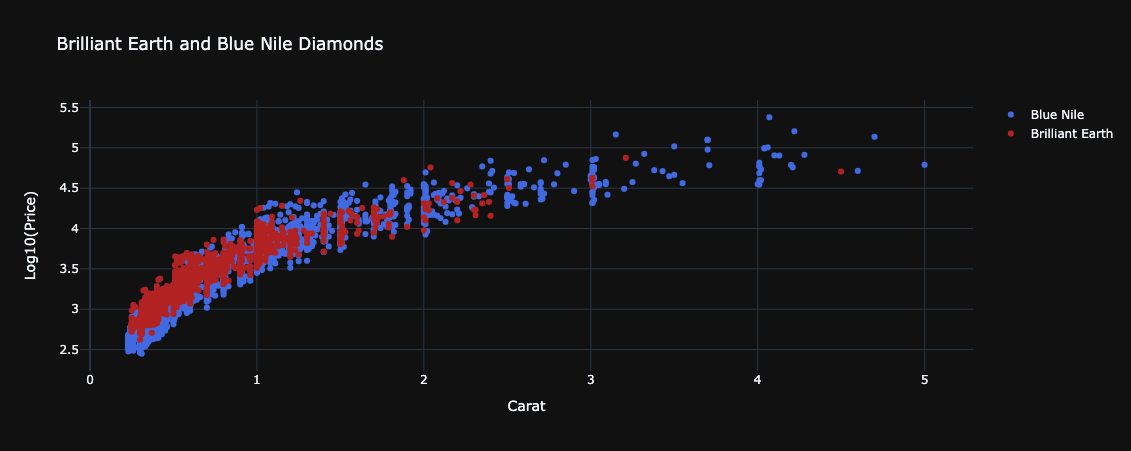

In [73]:
plot_df = dat[dat['shape']=='Round'].sample(5000)

# markercolor = plot_df.clarity
# markershape = plot_df.vendor.replace("Blue Nile","square").replace("Brilliant Earth","circle")

# marker=dict(
# #                 color=markercolor,
#                   symbol=markershape,
#                   opacity=0.9,
#                   reversescale=True,
#                   colorscale='Blues')
#     , line=dict(width=0.02),
#     mode='markers'
#     )

fig = go.Figure()

# blue nile
fig.add_trace(
    go.Scatter(
    x = plot_df[plot_df.vendor=='Blue Nile'].carat
    , y = plot_df[plot_df.vendor=='Blue Nile'].price.apply(lambda x: math.log10(x))
    , name = 'Blue Nile'
    , line=dict(color='royalblue', width=1)
    , mode='markers'
    )
)

# Brilliant Earth
fig.add_trace(
    go.Scatter(
    x = plot_df[plot_df.vendor=='Brilliant Earth'].carat
    , y = plot_df[plot_df.vendor=='Brilliant Earth'].price.apply(lambda x: math.log10(x))
    , name = 'Brilliant Earth'
    , line=dict(color='firebrick', width=1)
    , mode='markers'
    )
)

# Edit the layout
fig.update_layout(title='Brilliant Earth and Blue Nile Round Diamonds'
                  , xaxis_title='Carat'
                  , yaxis_title='Log10(Price)'
                 )
# dark theme 
fig.layout.template = 'plotly_dark'

fig.show()